Objectives:

what is the safest plane based on injuries and crash rate.

In [1]:
# import needed libraries
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv('AviationData.csv', encoding = 'latin_1', low_memory=False)

In [3]:
# see what df contains
df1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
# look into how many entries contain null files
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df1['Make'].value_counts()

Make
Cessna                            22227
Piper                             12029
CESSNA                             4922
Beech                              4330
PIPER                              2841
Bell                               2134
Boeing                             1594
BOEING                             1151
Grumman                            1094
Mooney                             1092
BEECH                              1042
Robinson                            946
Bellanca                            886
Hughes                              795
Schweizer                           629
Air Tractor                         595
BELL                                588
Mcdonnell Douglas                   526
Aeronca                             487
Maule                               445
Champion                            428
De Havilland                        382
Aero Commander                      360
Stinson                             348
Aerospatiale                       

In [7]:
# standardize names 
df1['Make'] = df1['Make'].replace({'BOEING' : 'Boeing'})
df1['Make'] = df1['Make'].replace({'BOEING COMPANY' : 'Boeing'})
df1['Make'] = df1['Make'].replace({'Airbus Industrie' : 'AIRBUS'})
df1['Make'] = df1['Make'].replace({'AIRBUS INDUSTRIE' : 'AIRBUS'})
df1['Make'] = df1['Make'].replace({'AIRBUS' : 'Airbus'})
df1['Make'] = df1['Make'].replace({'CESSNA AIRCRAFT COMPANY' : 'CESSNA'})
df1['Make'] = df1['Make'].replace({'CESSNA' : 'Cessna'})
df1['Make'] = df1['Make'].replace({'EMBRAER' : 'Embraer'})
df1['Make'] = df1['Make'].replace({'PIPER' : 'Piper'})
df1['Make'] = df1['Make'].replace({'BOMBARDIER INC' : 'BOMBARDIER'})
df1['Make'] = df1['Make'].replace({'BOMBARDIER' : 'Bombardier'})

In [8]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

In [9]:
# check exact values for null
df1.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [10]:
df1['Schedule']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
88884    NaN
88885    NaN
88886    NaN
88887    NaN
88888    NaN
Name: Schedule, Length: 88889, dtype: object

In [11]:
df1 = df1.drop(['Schedule'], axis = 1)

removed schedule column due to overwhelming missing data

In [12]:
df1.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: int64

change all na inputs in injury columns to 0 so i can count total fatal injuries and non fatal injuries 

In [13]:
df1['Total.Fatal.Injuries'].fillna(0.0, inplace = True)
df1['Total.Serious.Injuries'].fillna(0.0, inplace = True)
df1['Total.Minor.Injuries'].fillna(0.0, inplace = True)
df1.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,0.0,0.0,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980


In [14]:
df1['Number.of.Engines'].value_counts()

Number.of.Engines
1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: count, dtype: int64

In [15]:
# create def to gather percentage of each engine count

def engine_count(count):
    count_list = len(df1[df1['Number.of.Engines'] == count]) # only use specific engine count
    engine_total = len(df1['Number.of.Engines']) # total count 
    percent = (count_list / engine_total) * 100 # devide to find percent
    rounded = round(percent, 2) # round number
    return '{} engine airplanes are {} % of incidents'.format(count,rounded) # output

In [16]:
# create def to automate gathering the percentage of deaths per make vs total deaths of all crashes

def find_percent(make):
    make_list = df1[df1['Make'] == make] # only use specific make
    make_total = make_list['Total.Fatal.Injuries'].sum() # sum injuries for make
    total_fatal = df1['Total.Fatal.Injuries'].sum() # sum injuries for all entries
    percent = (make_total / total_fatal) * 100 # devide to find percent
    rounded = round(percent, 2) # round number
    return '{} % of total deaths'.format(rounded) # output    

In [17]:
# create def to automate gathering deaths vs total crashes per make

def find_death_per_crash(make):
    make_list = df1[df1['Make'] == make] # only use specific make
    make_total = len(make_list.loc[make_list['Total.Fatal.Injuries'] >= 1]) # count entries of specific make
    total_fatal = len(df1.loc[df1['Total.Fatal.Injuries'] >= 1]) # count total enties greater then one
    percent = (make_total / total_fatal) * 100 # devide to find percent
    rounded = round(percent, 2) # round numner
    return '{} % of incidents result in at least 1 death'.format(rounded) # output

In [18]:
# create def to count specific make incidnet count vs total incident count

def incident_count(make):
    make_list = df1[df1['Make'] == make] # only use specific make
    make_total = len(make_list) # count incident entries
    df_total = len(df1) # total entries for entire df
    percent = (make_total / df_total) * 100 # devide to find percent
    rounded = round(percent, 2) # round number
    return 'out of {} entries, {} is {} % ({}) of entries'.format(df_total, make, rounded, make_total) # output
    

percent of total fatalities, how many crashes resulted in death and percent of entries

In [19]:
boeing_percent_of_deaths = find_percent('Boeing')
boeing_fatality_rate = find_death_per_crash('Boeing')
boeing_total_rate = incident_count('Boeing')
print(boeing_percent_of_deaths)
print(boeing_fatality_rate)
print(boeing_total_rate)

17.43 % of total deaths
0.94 % of incidents result in at least 1 death
out of 88889 entries, Boeing is 3.1 % (2753) of entries


Boeing piecharts

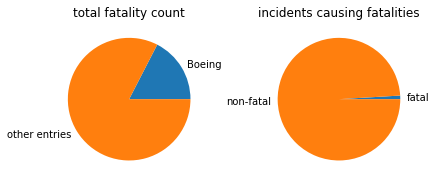

In [20]:
plt.subplot(1,2,1)
b = np.array([17.43,82.57])
b_labels = ['Boeing', 'other entries']
plt.pie(b, labels = b_labels)
plt.title('total fatality count')

plt.subplot(1,2,2)
b2 = np.array([0.94,99.06])
b2_labels = ['fatal', 'non-fatal']
plt.pie(b2, labels = b2_labels)
plt.title('incidents causing fatalities')

plt.tight_layout(pad = .5)
plt.show()

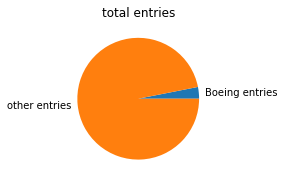

In [21]:
plt.subplot(1,2,1)
b3 = np.array([3.1, 96.9])
b3_labels = ('Boeing entries', 'other entries')
plt.pie(b3, labels = b3_labels)
plt.title('total entries')

plt.show()

In [22]:
airbus_percent_of_deaths = find_percent('Airbus')
airbus_fatality_rate = find_death_per_crash('Airbus')
airbus_total_rate = incident_count('Airbus')
print(airbus_percent_of_deaths)
print(airbus_fatality_rate)
print(airbus_total_rate)

4.98 % of total deaths
0.15 % of incidents result in at least 1 death
out of 88889 entries, Airbus is 0.51 % (455) of entries


Airbus piecharts

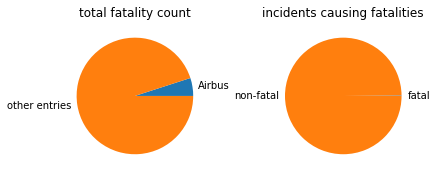

In [23]:
plt.subplot(1,2,1)
a = np.array([4.98, 95.02])
a_labels = ['Airbus', 'other entries']
plt.pie(a, labels = a_labels)
plt.title('total fatality count')

plt.subplot(1,2,2)
a2 = np.array([0.15, 99.85])
a2_labels = ['fatal', 'non-fatal']
plt.pie(a2, labels = a2_labels)
plt.title('incidents causing fatalities')

plt.tight_layout(pad = .5)
plt.show()

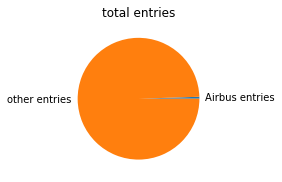

In [24]:
plt.subplot(1,2,1)
a3 = np.array([0.51, 99.49])
a3_labels = ('Airbus entries', 'other entries')
plt.pie(a3, labels = a3_labels)
plt.title('total entries')

plt.show()

In [25]:
cessna_percent_of_deaths = find_percent('Cessna')
cessna_fatality_rate = find_death_per_crash('Cessna')
cessna_total_rate = incident_count('Cessna')
print(cessna_percent_of_deaths)
print(cessna_fatality_rate)
print(cessna_total_rate)

19.23 % of total deaths
26.06 % of incidents result in at least 1 death
out of 88889 entries, Cessna is 30.55 % (27158) of entries


Cessna piecharts

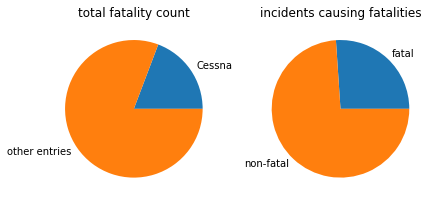

In [26]:
plt.subplot(1,2,1)
c = np.array([19.23, 80.77])
c_labels = ['Cessna', 'other entries']
plt.pie(c, labels = c_labels)
plt.title('total fatality count')

plt.subplot(1,2,2)
c2 = np.array([26.06, 73.94])
c2_labels = ['fatal', 'non-fatal']
plt.pie(c2, labels = c2_labels)
plt.title('incidents causing fatalities')

plt.tight_layout(pad = .5)
plt.show()

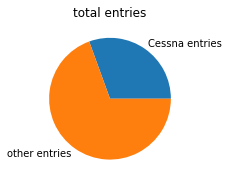

In [27]:
plt.subplot(1,2,1)
c3 = np.array([30.55, 69.45])
c3_labels = ('Cessna entries', 'other entries')
plt.pie(c3, labels = c3_labels)
plt.title('total entries')

plt.show()

In [28]:
engine_count(1)

'1 engine airplanes are 78.28 % of incidents'

In [29]:
engine_count(2)

'2 engine airplanes are 12.46 % of incidents'

create column for total injuries including death (Total_Injuries) and column for total non-fatal injuries (Total_Non_Fatal)

In [30]:
df1['Total_Injuries'] = df1['Total.Fatal.Injuries'] + df1['Total.Serious.Injuries'] + df1['Total.Minor.Injuries']

In [31]:
df1['Total_Non_Fatal'] = df1['Total.Serious.Injuries'] + df1['Total.Minor.Injuries']

In [32]:
df1

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total_Injuries,Total_Non_Fatal
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,2.0,0.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,4.0,0.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,3.0,0.0,0.0,NaN,IMC,Cruise,Probable Cause,26-02-2007,3.0,0.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,2.0,0.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,1.0,1.0
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,0.0,0.0
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0


In [33]:
len(df1.loc[df1['Total.Fatal.Injuries'] >= 1])

17813

gather make/models with 0 total injuries including deaths

In [34]:
list_with_no_injuries = df1.loc[df1['Total_Injuries'] < 1]['Model']

In [35]:
list_with_no_injuries.head()

7           140
8          401B
10    PA-28-161
11         V35B
16         280C
Name: Model, dtype: object

In [36]:
len(list_with_no_injuries)

48398

In [37]:
len(df1) - len(list_with_no_injuries)

40491

while list_with_no_injuries has over 40,000 less entries due to removing entries that have any injuries, this list is still to large to base a purchase off of

In [38]:
df1

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total_Injuries,Total_Non_Fatal
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,2.0,0.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,4.0,0.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,3.0,0.0,0.0,NaN,IMC,Cruise,Probable Cause,26-02-2007,3.0,0.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,2.0,0.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,1.0,1.0
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,0.0,0.0
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0


In [39]:
df1['Aircraft.damage'].value_counts()

Aircraft.damage
Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: count, dtype: int64

create new df that only contains incidents with minor damage and no injuries

In [40]:
minor_damage = df1[df1['Aircraft.damage'] == 'Minor']

In [41]:
no_injuries = df1[df1['Total_Injuries'] == 0.0]

In [42]:
df2 = minor_damage.merge(no_injuries, how = 'inner')

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                2287 non-null   object 
 1   Investigation.Type      2287 non-null   object 
 2   Accident.Number         2287 non-null   object 
 3   Event.Date              2287 non-null   object 
 4   Location                2279 non-null   object 
 5   Country                 2277 non-null   object 
 6   Latitude                668 non-null    object 
 7   Longitude               668 non-null    object 
 8   Airport.Code            1439 non-null   object 
 9   Airport.Name            1485 non-null   object 
 10  Injury.Severity         2065 non-null   object 
 11  Aircraft.damage         2287 non-null   object 
 12  Aircraft.Category       937 non-null    object 
 13  Registration.Number     2164 non-null   object 
 14  Make                    2277 non-null   

In [44]:
df2['Number.of.Engines'].fillna(0.0, inplace = True)

In [45]:
df2[df2['Number.of.Engines'] > 0.0]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total_Injuries,Total_Non_Fatal
0,20020917X02333,Incident,LAX82IA034,1982-01-03,"VAN NUYS, CA",United States,NaN,NaN,VNY,VAN NUYS,...,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,03-01-1983,0.0,0.0
1,20020917X01764,Incident,ATL82IA029,1982-01-05,"PENSACOLA, FL",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,VMC,Cruise,Probable Cause,05-01-1983,0.0,0.0
2,20020917X01765,Incident,ATL82IA034,1982-01-12,"CLARKSBURG, WV",United States,NaN,NaN,CKB,BENEDUM,...,0.0,0.0,0.0,2.0,VMC,Taxi,Probable Cause,12-01-1983,0.0,0.0
3,20020917X01766,Incident,ATL82IA038,1982-01-19,"WASHINGTON, DC",United States,NaN,NaN,IAD,NaN,...,0.0,0.0,0.0,1.0,IMC,Descent,Probable Cause,19-01-1983,0.0,0.0
4,20020917X02334,Incident,LAX82IA044,1982-01-20,"SAN JOSE, CA",United States,NaN,NaN,SJC,SAN JOSE MUNICIPAL,...,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,20-01-1983,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280,20220805105670,Accident,ERA22LA358,2022-07-28,"Dillingham, AK",United States,059241N,1583020W,DLG,Dilingham,...,0.0,0.0,0.0,3.0,VMC,NaN,NaN,18-08-2022,0.0,0.0
2283,20221018106144,Incident,DCA23WA019,2022-10-14,"Keflavík,",Iceland,635857N,0223740W,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
2284,20221027106213,Accident,ERA23LA043,2022-10-27,"Roberta, GA",United States,324249N,0084143W,0GA9,GENTLE LANDINGS AIR PARK,...,0.0,0.0,0.0,3.0,VMC,NaN,NaN,30-11-2022,0.0,0.0
2285,20221122106343,Incident,ENG23WA003,2022-10-27,"Nanjing Lukou International Airport,",China,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0


In [46]:
df2['Number.of.Engines'].value_counts()

Number.of.Engines
2.0    954
1.0    551
0.0    496
3.0    156
4.0    130
Name: count, dtype: int64

In [47]:
df2['Aircraft.Category'].value_counts()

Aircraft.Category
Airplane        879
Helicopter       55
Unknown           2
Powered-Lift      1
Name: count, dtype: int64

narrow down to only airplane entries

In [48]:
df3 = df2[df2['Aircraft.Category'] == 'Airplane']

In [49]:
df3['Aircraft.Category'].value_counts()

Aircraft.Category
Airplane    879
Name: count, dtype: int64

In [50]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 879 entries, 0 to 2285
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                879 non-null    object 
 1   Investigation.Type      879 non-null    object 
 2   Accident.Number         879 non-null    object 
 3   Event.Date              879 non-null    object 
 4   Location                878 non-null    object 
 5   Country                 879 non-null    object 
 6   Latitude                410 non-null    object 
 7   Longitude               410 non-null    object 
 8   Airport.Code            500 non-null    object 
 9   Airport.Name            521 non-null    object 
 10  Injury.Severity         685 non-null    object 
 11  Aircraft.damage         879 non-null    object 
 12  Aircraft.Category       879 non-null    object 
 13  Registration.Number     849 non-null    object 
 14  Make                    879 non-null    object

In [51]:
df3['Amateur.Built'].value_counts()

Amateur.Built
No     847
Yes     26
Name: count, dtype: int64

remove amateur built planes

In [52]:
df4 = df3[df3['Amateur.Built'] == 'No']

In [53]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 847 entries, 0 to 2285
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                847 non-null    object 
 1   Investigation.Type      847 non-null    object 
 2   Accident.Number         847 non-null    object 
 3   Event.Date              847 non-null    object 
 4   Location                846 non-null    object 
 5   Country                 847 non-null    object 
 6   Latitude                391 non-null    object 
 7   Longitude               391 non-null    object 
 8   Airport.Code            478 non-null    object 
 9   Airport.Name            500 non-null    object 
 10  Injury.Severity         653 non-null    object 
 11  Aircraft.damage         847 non-null    object 
 12  Aircraft.Category       847 non-null    object 
 13  Registration.Number     822 non-null    object 
 14  Make                    847 non-null    object

new df with entries that have more than one engine as it is safer.

In [54]:
df5 = df4[df4['Number.of.Engines'] > 1]

In [55]:
df5['Model'].value_counts()

Model
737            26
747            17
777             7
767             7
402C            6
               ..
CL600           1
65-B80          1
146             1
G-1159A         1
BD-700-2A12     1
Name: count, Length: 252, dtype: int64

In [56]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [57]:
df5 = df5.reset_index()

In [58]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   395 non-null    int64  
 1   Event.Id                395 non-null    object 
 2   Investigation.Type      395 non-null    object 
 3   Accident.Number         395 non-null    object 
 4   Event.Date              395 non-null    object 
 5   Location                395 non-null    object 
 6   Country                 395 non-null    object 
 7   Latitude                214 non-null    object 
 8   Longitude               214 non-null    object 
 9   Airport.Code            305 non-null    object 
 10  Airport.Name            317 non-null    object 
 11  Injury.Severity         331 non-null    object 
 12  Aircraft.damage         395 non-null    object 
 13  Aircraft.Category       395 non-null    object 
 14  Registration.Number     389 non-null    ob

In [59]:
df5['Make'].value_counts()

Make
Boeing                            141
Airbus                             39
Cessna                             30
Bombardier                         24
Piper                              21
Embraer                            18
BEECH                              12
Beech                              11
MCDONNELL DOUGLAS                   7
Swearingen                          5
RAYTHEON AIRCRAFT COMPANY           5
De Havilland                        4
Hawker Beechcraft Corp.             4
ATR                                 4
Mcdonnell Douglas                   4
DOUGLAS                             3
Rockwell                            3
Lockheed                            3
Douglas                             3
GULFSTREAM AEROSPACE                2
FAIRCHILD                           2
BRITISH AEROSPACE                   2
Gulfstream American                 2
BAE                                 2
THE BOEING COMPANY                  2
RAYTHEON                            2
Raytheo

In [60]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   395 non-null    int64  
 1   Event.Id                395 non-null    object 
 2   Investigation.Type      395 non-null    object 
 3   Accident.Number         395 non-null    object 
 4   Event.Date              395 non-null    object 
 5   Location                395 non-null    object 
 6   Country                 395 non-null    object 
 7   Latitude                214 non-null    object 
 8   Longitude               214 non-null    object 
 9   Airport.Code            305 non-null    object 
 10  Airport.Name            317 non-null    object 
 11  Injury.Severity         331 non-null    object 
 12  Aircraft.damage         395 non-null    object 
 13  Aircraft.Category       395 non-null    object 
 14  Registration.Number     389 non-null    ob

In [61]:
df5.drop('index', axis = 1, inplace = True)

at this point, i looked into the top performing planes to gather the rest of my information. 

In [62]:
recs = {
'primary_rec' : {'primary_rec': 'Airbus a330', 
             'size' : 'medium', 
             'engine type' : '2 turbo fans', 
             'capacity' : '220 - 260', 
             'reasons' : 'the Airbus a330 is smaller then the B747, with only 2 engines, allwoing it to be quiter then the B747, as well as extremely safe.', 
             'still in production' : 'yes', 
             'Airbus percent of fatalities vs all entries' : airbus_percent_of_deaths,
             'Airbus flights fatality rate' : airbus_fatality_rate,
             'total percent of entries vs all entries' : airbus_total_rate,
             'number of exits' : '8'},

'secondary_rec' : {'secondary_rec': 'B747', 
                 'size': 'largest Boeing produces', 
                 'engine type': '4 turbo fans', 
                 'capacity' : '276 - 467', 
                 'reasons' : 'B747 has been choosen to be the secondary recommendation mainly due to the fact it has 4 engines instead of 2. while this allows for more redundancy, a common complaint among passengers is how loud the aircraft actually is. it boasts very good safety records.', 
                 'still in production': 'no',
                 'Boeing percent of fatlities vs all entries' : boeing_percent_of_deaths,
                 'Boeing flights fatality rate' : boeing_fatality_rate,
                 'total percent of entries vs all entries' : boeing_total_rate,
                 'number of exits' : '9'},

'third_rec' : {'third_rec' : 'Cessna Latitude', 
             'size' : 'small business jet', 
             'engine type' : '2 turbo fans', 
             'capacity' : 'max 9', 
             'reasons' : 'The Cessna Latitude is extremely safe and is also the most popular for personal / business ventures in the Cessna family.', 
             'still in production' : 'yes',
             'Cessna percent of fatalities vs all entries' : cessna_percent_of_deaths,
             'Cessna flights fatality rate' : cessna_fatality_rate,
             'total percent of entries vs all entries' : cessna_total_rate,
             'number of exits' : '1'}
}

In [63]:
recs['primary_rec']

{'primary_rec': 'Airbus a330',
 'size': 'medium',
 'engine type': '2 turbo fans',
 'capacity': '220 - 260',
 'reasons': 'the Airbus a330 is smaller then the B747, with only 2 engines, allwoing it to be quiter then the B747, as well as extremely safe.',
 'still in production': 'yes',
 'Airbus percent of fatalities vs all entries': '4.98 % of total deaths',
 'Airbus flights fatality rate': '0.15 % of incidents result in at least 1 death',
 'total percent of entries vs all entries': 'out of 88889 entries, Airbus is 0.51 % (455) of entries',
 'number of exits': '8'}

In [64]:
recs['secondary_rec']

{'secondary_rec': 'B747',
 'size': 'largest Boeing produces',
 'engine type': '4 turbo fans',
 'capacity': '276 - 467',
 'reasons': 'B747 has been choosen to be the secondary recommendation mainly due to the fact it has 4 engines instead of 2. while this allows for more redundancy, a common complaint among passengers is how loud the aircraft actually is. it boasts very good safety records.',
 'still in production': 'no',
 'Boeing percent of fatlities vs all entries': '17.43 % of total deaths',
 'Boeing flights fatality rate': '0.94 % of incidents result in at least 1 death',
 'total percent of entries vs all entries': 'out of 88889 entries, Boeing is 3.1 % (2753) of entries',
 'number of exits': '9'}

In [65]:
recs['third_rec']

{'third_rec': 'Cessna Latitude',
 'size': 'small business jet',
 'engine type': '2 turbo fans',
 'capacity': 'max 9',
 'reasons': 'The Cessna Latitude is extremely safe and is also the most popular for personal / business ventures in the Cessna family.',
 'still in production': 'yes',
 'Cessna percent of fatalities vs all entries': '19.23 % of total deaths',
 'Cessna flights fatality rate': '26.06 % of incidents result in at least 1 death',
 'total percent of entries vs all entries': 'out of 88889 entries, Cessna is 30.55 % (27158) of entries',
 'number of exits': '1'}

In [66]:
df1.to_csv('df1.csv')